### We are applying a Deep Learning model on mnist dataset

In [2]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical

from matplotlib.pyplot import imshow
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
from matplotlib.pyplot import imshow

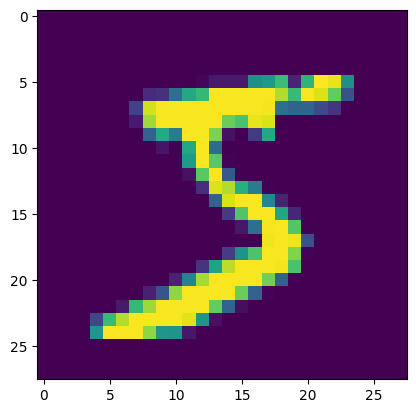

In [6]:
imshow(train_images[0])

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_labels[0]

5

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
test_labels.shape

(10000,)

In [13]:
from keras import models, layers

In [14]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [15]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [17]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 12ms/step - loss: 0.2661 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1058 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0699 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0508 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0382 - accuracy: 0.9887


In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:' ,test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0656 - accuracy: 0.9788
test_acc: 0.9787999987602234


In [20]:
network.predict(train_images[3].reshape(1, 28*28)).argmax()

1/1 [==============================] - 0s 356ms/step


1

### Let's do it in another way with one-hot encoded data

In [21]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [22]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [23]:
print(train_labels.shape)
print(train_labels[0])
print(train_labels[1])
print(train_labels.dtype)

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
float32


In [24]:
test_labels = to_categorical(test_labels)

In [25]:
print(test_labels.shape)
print(test_labels[0])
print(test_labels[1])
print(test_labels.dtype)

(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
float32


In [41]:
#This problem is multi-class classification

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [42]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)


In [43]:
network.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

### Data representations for neural networks

In [ ]:
# Scalars (0D tensors)

import numpy as np
x = np.array(12)
print(x)

x.ndim

12


0

In [ ]:
# Vectors (1D tensors)

x = np.array([12, 3, 6, 14])
print(x)

x.ndim

[12  3  6 14]


1

In [ ]:
# Matrices (2D tensors)

x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x)

x.ndim

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]


2

In [ ]:
# 3D tensors and higher dimensions tensors

x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]])
print(x)

x.ndim

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]


3

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.ndim)

3


In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
print(train_images.dtype)

uint8


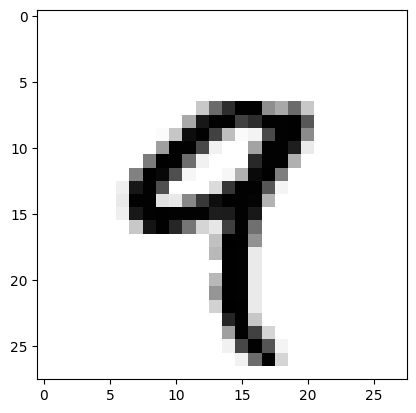

In [ ]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in Numpy

In [ ]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
